<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
# initial attempt which couldnt be fully used
#input_file = csv.DictReader(open('satdatadesktop.csv'))
#for row in input_file:
#    print row

In [3]:
# printing list of lists first
import csv
with open('satdatadesktop.csv', mode='r') as file:
    reader = csv.reader(file)
    satdatalist = []
    for row in reader:
        satdatalist.append(row)
print satdatalist

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

In [4]:
# converting data imported using csv module into dictionary
satdict = {}
for id, key in enumerate(satdatalist[0]):
    satdict[key] = []
    for value in satdatalist[1:]:
        #print value
        satdict[key].append(value[id])
            
print satdict            

{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', 

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
# making dataframe with earlier dictionary
satdictdf = pd.DataFrame.from_dict(satdict, orient='columns', dtype=None)
satdictdf.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object

In [6]:
# using pandas function to read csv file
satdata = pd.read_csv('satdatadesktop.csv')
satdata.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [7]:
# As explained below, loading from the file using the csv module produces a dataframe with columns containing objects,
# whereas using the pandas read function products a dataframe containing other data types as appropriate
# (which in this case happen to be integers)

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [8]:
satdata.shape

(52, 4)

In [9]:
satdata.head(10)
# data describes the different states within the US (and their associated two alphabet reference codes), 
# the percentage of students sitting for the SAT in each state and the average verbal and math scores per student

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [10]:
#satdata

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [11]:
satdatadict = {'description of data in column':{'State':'two letter code corresponding to each state within the US(string data)',
              'Rate':'participation rate within the state(integer data)',
              'Verbal':'average verbal scores within the state(integer data)',
               'Math':'average math scores within the state(integer data)','Shape':'52 rows and 4 columns'}}

In [12]:
satdatadict

{'description of data in column': {'Math': 'average math scores within the state(integer data)',
  'Rate': 'participation rate within the state(integer data)',
  'Shape': '52 rows and 4 columns',
  'State': 'two letter code corresponding to each state within the US(string data)',
  'Verbal': 'average verbal scores within the state(integer data)'}}

In [13]:
# printing data dictionary
satdatadict1 = pd.DataFrame.from_dict(satdatadict)
satdatadict1

,description of data in column
Math,average math scores within the state(integer d...
Rate,participation rate within the state(integer data)
Shape,52 rows and 4 columns
State,two letter code corresponding to each state wi...
Verbal,average verbal scores within the state(integer...


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [14]:
# import seaborn lib
import seaborn as sns

In [15]:
# get series data for use as argument
satrate = satdata['Rate']
satmath = satdata['Math']
satverbal = satdata['Verbal']

Text(0.5,1,u'Distribution of SAT Rates')

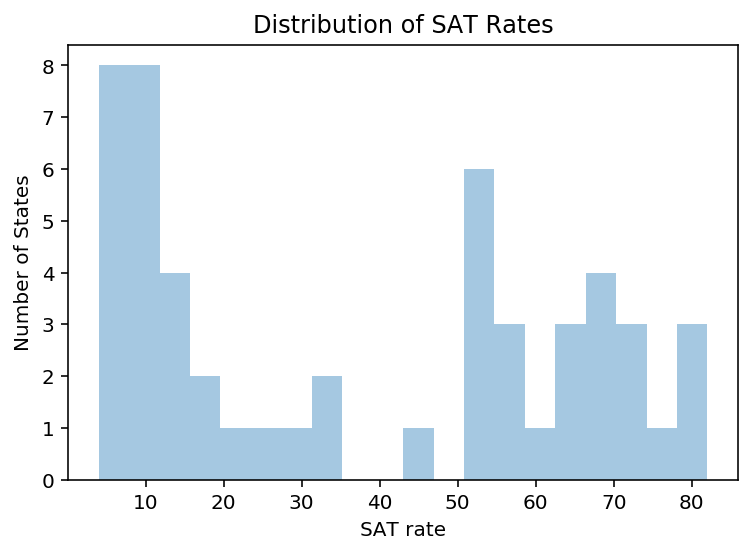

In [16]:
# distplot for rate
df10 = sns.distplot(satrate, bins=20, hist=True, kde=False, rug=False, fit=None, hist_kws=None, kde_kws=None, 
             rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel='SAT rate', 
             label=None, ax=None)
df10.set(ylabel='Number of States')
df10.set_title('Distribution of SAT Rates')

Text(0.5,1,u'Distribution of Math Scores')

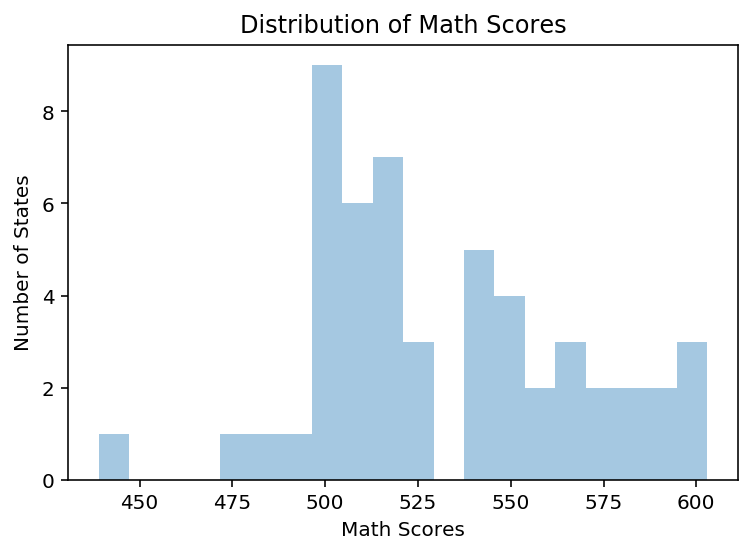

In [17]:
# distplot for math
df11 = sns.distplot(satmath, bins=20, hist=True, kde=False, rug=False, fit=None, hist_kws=None, kde_kws=None, 
             rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel='Math Scores', 
             label=None, ax=None)
df11.set(ylabel='Number of States')
df11.set_title('Distribution of Math Scores')

Text(0.5,1,u'Distribution of Verbal Scores')

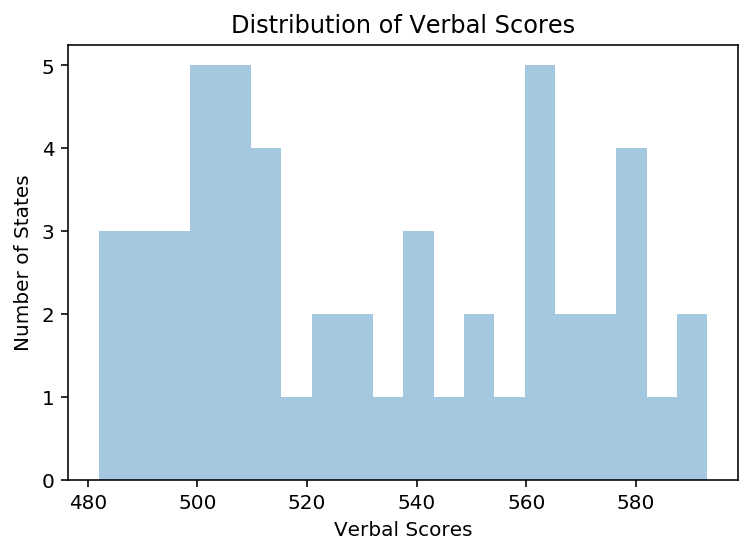

In [18]:
# distplot for verbal
df12 = sns.distplot(satverbal, bins=20, hist=True, kde=False, rug=False, fit=None, hist_kws=None, kde_kws=None, 
             rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel='Verbal Scores', 
             label=None, ax=None)
df12.set(ylabel='Number of States')
df12.set_title('Distribution of Verbal Scores')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

In [19]:
satdata2 = satdata[['Rate','Math','Verbal']]

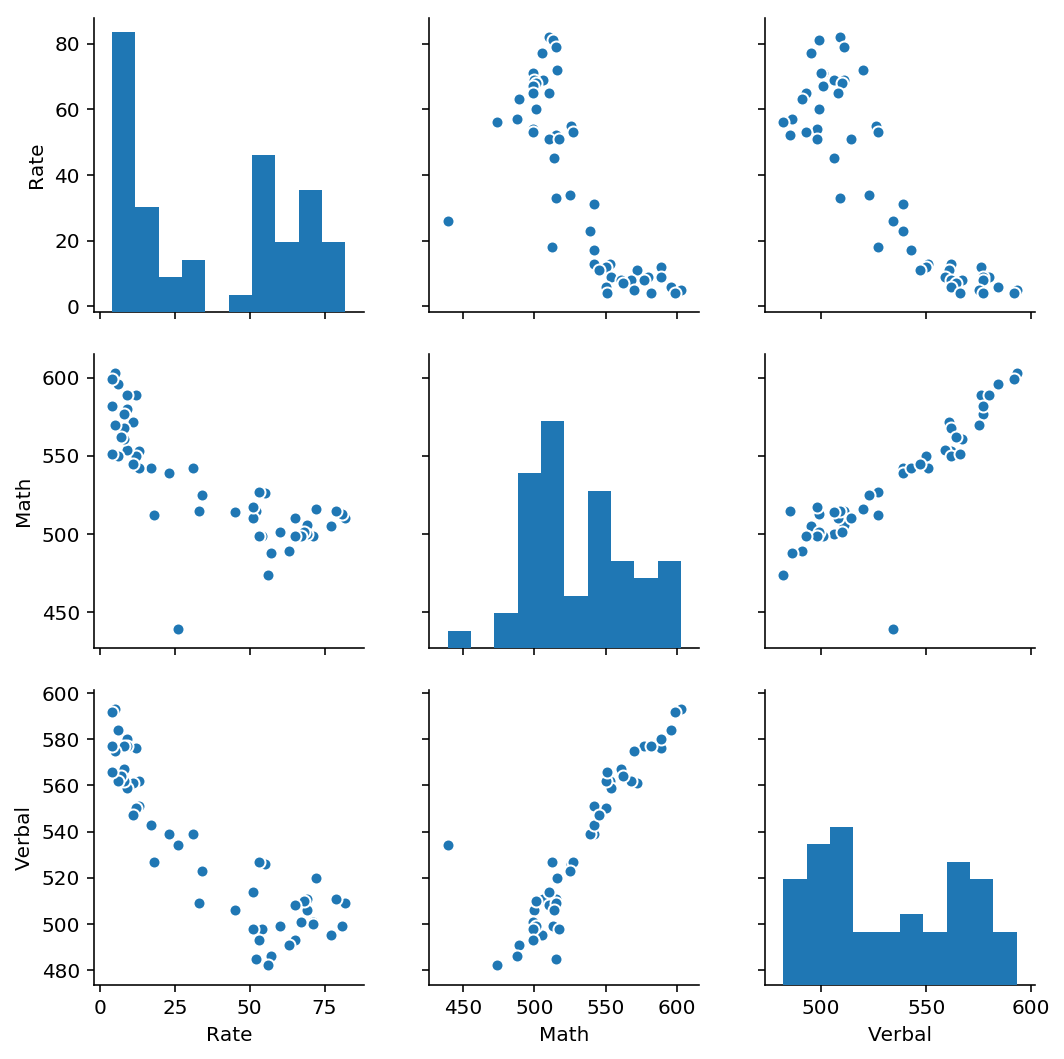

In [20]:
sns.pairplot(satdata2, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, 
             kind='scatter', diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, 
             plot_kws=None, diag_kws=None, grid_kws=None)

In [21]:
# The diagonal histograms notwithstanding, the visualisation is essentially a scatter plot indicating the 
# relationship between pairs of variables within the data.

# The relationship between Rate & Math and Rate & Verbal appears to be negative based on the negative gradient 
# seen in the trend of the pairplots between each of these two sets of variables.

# The relationship between Verbal & Math appears to be positive based on the positive gradient seen in the trend
# of the pairplot between these two variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

Text(0.5,1,u'Combined Math and Verbal Scores')

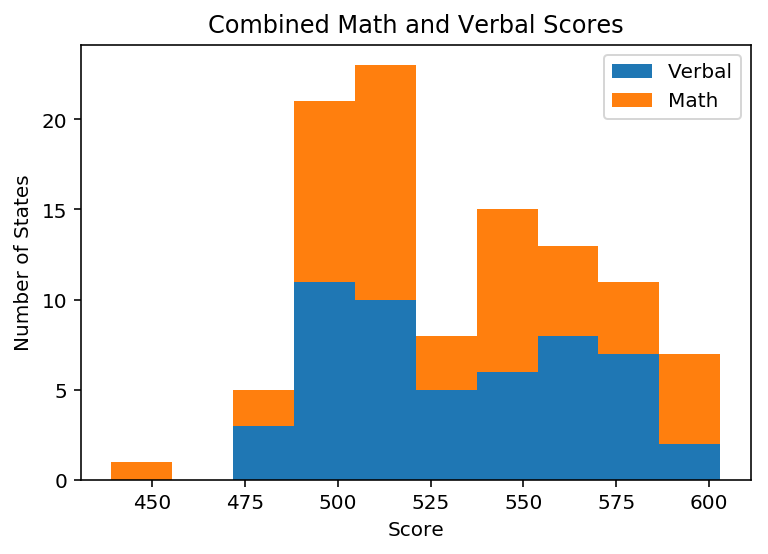

In [22]:
# stacked histogram of verbal and math using pandas
df13 = satdata[['Verbal','Math']].plot.hist(stacked=True)
df13.set(ylabel='Number of States',xlabel='Score')
df13.set_title('Combined Math and Verbal Scores')

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

In [23]:
verbalmath = satdata[['Verbal','Math']]

Text(0.5,1,u'Box Plot of Verbal and Math Scores')

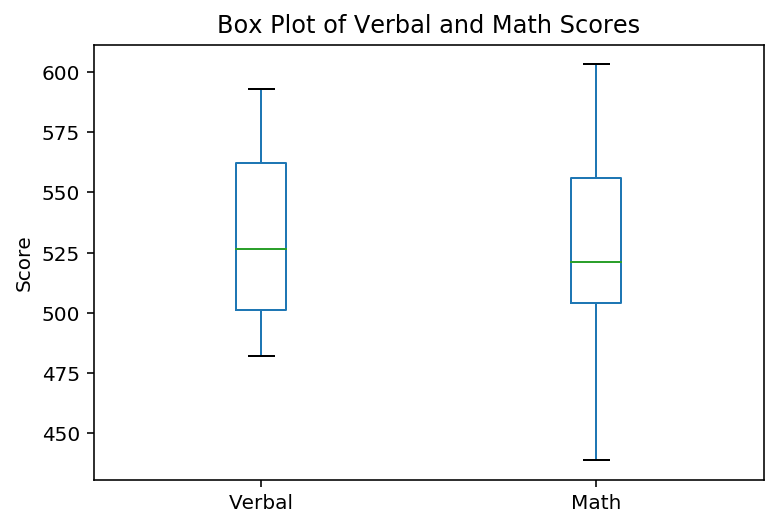

In [24]:
# box plot for verbal and math
df14 = verbalmath.plot.box()
df14.set(ylabel='Score')
df14.set_title('Box Plot of Verbal and Math Scores')

In [25]:
# Advantages of box plot over scatterplots and histograms include 1) the fact that they show outliers and 
# 2) show a variable's symmetry and skewness at a glance, in addition to allowing for side by side comparisons
# to be made between more than one variable (when multiple variables are plotted in this manner)

In [26]:
# Rate is a measure of proportion as opposed to an abosolute measure, and hence given the conceptual (and scaling)
# differences involved, plotting the Rate values here would have led to inaccurate comparisons being made
# regarding the distributions of the variables

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [27]:
# scale the verbal and math scores to reflect a range of 0 to 100, to coincide with the range for the rate variable
# this involves dividing the verbal and math scores by 8 as they are both scored from a range of 0 to 800
satdata3 = satdata
satdata3['Verbal%'] = satdata[['Verbal']]/8
satdata3['Math%'] = satdata[['Math']]/8
verbalmathrate = satdata3[['Verbal%','Math%','Rate']]

Text(0.5,1,u'Box Plot of Scaled Verbal/Math Scores and SAT Rate')

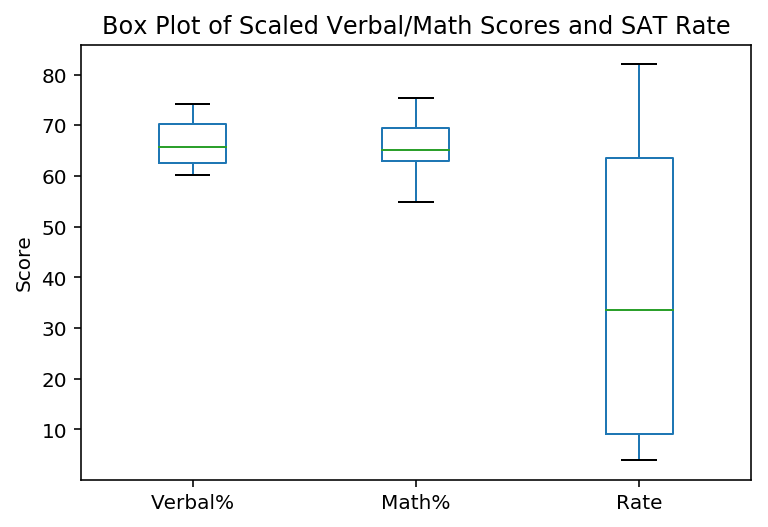

In [28]:
# plot scaled data
df15 = verbalmathrate.plot.box()
df15.set(ylabel='Score')
df15.set_title('Box Plot of Scaled Verbal/Math Scores and SAT Rate')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [29]:
# calculating mean verbal scores
satdata['Verbal'].mean()

532.0192307692307

In [30]:
satdata[(satdata['Verbal'])>(satdata['Verbal'].mean())][['State']]

,State
26,CO
27,OH
28,MT
30,ID
31,TN
32,NM
33,IL
34,KY
35,WY
36,MI


In [31]:
satdata[(satdata['Verbal'])>(satdata['Verbal'].mean())][['State']].count()

State    24
dtype: int64

In [32]:
# 24 states have verbal scores greater than the national average.

# In the absence of carrying out additional calculations, the implication of this 
# would be that the verbal scores are distributed fairly symmetrically around the average
# given that 24 is approximately half of the total number of data points we have

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [33]:
satdata[(satdata['Verbal'])>(satdata['Verbal'].median())][['State']]

,State
19,WA
26,CO
27,OH
28,MT
29,WV
30,ID
31,TN
32,NM
33,IL
34,KY


In [34]:
satdata[(satdata['Verbal'])>(satdata['Verbal'].median())][['State']].count()

State    26
dtype: int64

In [35]:
# There are two more states with scores above the median when compared to the number of states with scores
# above the mean

# This can be potentially attributed to a left skewed distribution do to the presence of outliers
# (states with significantly lower scores well below the mean)

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [36]:
satdata['Verbalmathdiff'] = satdata['Verbal']-satdata['Math']

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [37]:
# top 10 states with verbal greater than math
newdf1 = satdata[(satdata['Verbalmathdiff'])>0][['State','Verbalmathdiff']]
newdf2 = newdf1.sort_values(by=['Verbalmathdiff'],ascending=False).head(10)
newdf2

,State,Verbalmathdiff
27,OH,95
29,WV,15
50,MS,15
45,AR,12
31,TN,9
9,VA,9
32,NM,9
16,DC,8
41,OK,6
8,ME,6


In [38]:
# top 3 states with verbal scores higher than math scores 
newdf2.head(3)

,State,Verbalmathdiff
27,OH,95
29,WV,15
50,MS,15


In [39]:
# top 10 states with math greater than verbal
newdf3 = satdata[(satdata['Verbalmathdiff'])<0][['State','Verbalmathdiff']]
newdf4 = newdf3.sort_values(by=['Verbalmathdiff'],ascending=True).head(10)
newdf4

,State,Verbalmathdiff
21,HI,-30
23,CA,-19
1,NJ,-14
33,IL,-13
44,WI,-12
36,MI,-11
3,NY,-10
47,IA,-10
37,MN,-9
51,All,-8


In [40]:
# top 3 states with math scores higher than verbal scores 
newdf4.head(3)

,State,Verbalmathdiff
21,HI,-30
23,CA,-19
1,NJ,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [41]:
# creating correlation matrix using function, and dataframe containing only rate, verbal and math data
satdata2.corr(method='pearson', min_periods=1)

,Rate,Math,Verbal
Rate,1.000000,-0.773746,-0.886432
Math,-0.773746,1.000000,0.899871
Verbal,-0.886432,0.899871,1.000000


In [42]:
# The correlation matrix shows that the average verbal and math scores are highly positively correlated

# It also shows that the average verbal and math scores are negatively correlated with the rate of taking the exams
# within each state

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [43]:
satdata.describe(include='all')

,State,Rate,Verbal,Math,Verbal%,Math%,Verbalmathdiff
count,52,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
unique,52,NaN,NaN,NaN,NaN,NaN,NaN
top,SD,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,37.153846,532.019231,531.500000,66.502404,66.437500,0.519231
std,NaN,27.301788,33.236225,36.014975,4.154528,4.501872,15.729939
min,NaN,4.000000,482.000000,439.000000,60.250000,54.875000,-30.000000
25%,NaN,9.000000,501.000000,504.000000,62.625000,63.000000,-6.000000
50%,NaN,33.500000,526.500000,521.000000,65.812500,65.125000,0.000000
75%,NaN,63.500000,562.000000,555.750000,70.250000,69.468750,4.250000


In [44]:
# Count - the total number of data values for each column
# Unique - the unique number of values for categorical variables
# Top - the most frequent value for categorical variables
# Freq - the frequency associated with the top value
# Mean - the mean/average for each column for numerical variables
# Std - the standard deviation for each column for numerical variables
# Min - the lowest/minumum value for each column for numerical variables
# 25% - the 25th percentile value for each column for numerical variables
# 50% - the 50th percentile or median value for each column for numerical variables
# 75% - the 75th percentile value for each column for numerical variables
# Max - the highest/maximum value for each column for numerical variables

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [45]:
satdata2.cov(min_periods=None)

,Rate,Math,Verbal
Rate,745.387632,-760.803922,-804.355958
Math,-760.803922,1297.078431,1077.147059
Verbal,-804.355958,1077.147059,1104.646682


In [46]:
# 1) Covariance does not consist of scaled/standardised values to measure the relationship between variables
# and shows an absolute measure. The covariance of a variable with itself would be its variance

# 2) Mathematically, this works out to the covariance between the two variables divided by the product of the
# standard deviations of the two variables

# 3) Given the standardised measure, it requires no prior knowledge of the distribution and size of the variables
# to understand the strength of relationship between the variables

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [47]:
drugs = pd.read_csv('drug-use-by-age.csv')
drugs.head()

# Initial analysis indicates that there are missing values in certain fields, ie frequency of crack use amongst
# 12 year olds. Depending on the extent of missing data, the analysis for certain columns may need to involve
# either populating the data with dummy variables for completeness, or abandoning the consideration of that data
# column as part of this EDA process altogether.

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [48]:
drugs.shape

(17, 28)

In [49]:
drugs.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [50]:
drugs.describe(include='all')

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17,17.000000,17,...,17.000000,17,17.000000,17.000000,17.000000,17.000000,17.000000,17,17.000000,17.000000
unique,17,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,13,...,NaN,15,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN
top,22-23,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,-,...,NaN,13.5,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,3,...,NaN,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
mean,NaN,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,NaN,0.294118,NaN,...,0.935294,NaN,2.805882,11.735294,1.917647,31.147059,0.382353,NaN,0.282353,19.382353
std,NaN,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,NaN,0.235772,NaN,...,0.608216,NaN,1.753379,11.485205,1.407673,85.973790,0.262762,NaN,0.138000,24.833527
min,NaN,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,NaN,0.000000,NaN,...,0.000000,NaN,0.200000,4.500000,0.000000,2.000000,0.000000,NaN,0.000000,3.000000
25%,NaN,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,NaN,0.000000,NaN,...,0.400000,NaN,1.400000,6.000000,0.600000,7.000000,0.200000,NaN,0.200000,6.500000
50%,NaN,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,NaN,0.400000,NaN,...,1.100000,NaN,3.500000,10.000000,1.800000,10.000000,0.400000,NaN,0.300000,10.000000
75%,NaN,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,NaN,0.500000,NaN,...,1.400000,NaN,4.200000,11.000000,3.000000,12.000000,0.600000,NaN,0.400000,17.500000


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [51]:
# creating subset containing only percentage use
drugsper = drugs[drugs.columns.drop(list(drugs.filter(regex='frequency')))]
drugsper = drugsper.drop(labels='n', axis=1)
drugsper

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2
5,17,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5
6,18,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4
7,19,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3
8,20,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5
9,21,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3


In [52]:
drugsper.describe()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,55.429412,18.923529,2.176471,0.294118,0.352941,3.394118,1.388235,6.270588,0.935294,2.805882,1.917647,0.382353,0.282353
std,26.878866,11.959752,1.816772,0.235772,0.333762,2.792506,0.927283,3.166379,0.608216,1.753379,1.407673,0.262762,0.138000
min,3.900000,1.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.600000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,40.100000,8.700000,0.500000,0.000000,0.100000,0.600000,0.600000,3.900000,0.400000,1.400000,0.600000,0.200000,0.200000
50%,64.600000,20.800000,2.000000,0.400000,0.200000,3.200000,1.400000,6.200000,1.100000,3.500000,1.800000,0.400000,0.300000
75%,77.500000,28.400000,4.000000,0.500000,0.600000,5.200000,2.000000,9.000000,1.400000,4.200000,3.000000,0.600000,0.400000
max,84.200000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.400000,4.100000,0.900000,0.500000


In [53]:
# creating subset containing only frequence of use
drugsfreq = drugs[drugs.columns.drop(list(drugs.filter(regex='use')))]
drugsfreq = drugsfreq.drop(labels='n', axis=1)
# drugsfreq2 = drugsfreq.fillna(value=0.0, axis=1, inplace=False)
drugsfreq2 = drugsfreq.replace('-', 0.0)

In [54]:
drugsfreq2

,age,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,12,3.0,4.0,5.0,0,35.5,52.0,19.0,36.0,24.5,52.0,2.0,0,13.0
1,13,6.0,15.0,1.0,3.0,0,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,14,5.0,24.0,5.5,0,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,15,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,16,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0
5,17,13.0,36.0,5.0,21.0,64.0,3.0,4.0,9.0,6.0,7.0,9.0,48.0,6.5
6,18,24.0,52.0,5.0,10.0,46.0,4.0,4.0,12.0,7.0,12.0,8.0,12.0,10.0
7,19,36.0,60.0,5.5,2.0,180.0,3.0,3.0,12.0,7.5,4.5,6.0,105.0,6.0
8,20,48.0,60.0,8.0,5.0,45.0,2.0,4.0,10.0,12.0,10.0,12.0,12.0,4.0
9,21,52.0,52.0,5.0,17.0,30.0,4.0,2.0,15.0,13.5,7.0,10.0,2.0,9.0


In [55]:
drugsfreq2.dtypes

age                         object
alcohol-frequency          float64
marijuana-frequency        float64
cocaine-frequency           object
crack-frequency             object
heroin-frequency            object
hallucinogen-frequency     float64
inhalant-frequency          object
pain-releiver-frequency    float64
oxycontin-frequency         object
tranquilizer-frequency     float64
stimulant-frequency        float64
meth-frequency              object
sedative-frequency         float64
dtype: object

In [56]:
# converting all columns to floats within frequency subset
drugsfreq2['cocaine-frequency']=drugsfreq2['cocaine-frequency'].astype(float)
drugsfreq2['crack-frequency']=drugsfreq2['crack-frequency'].astype(float)
drugsfreq2['heroin-frequency']=drugsfreq2['heroin-frequency'].astype(float)
drugsfreq2['inhalant-frequency']=drugsfreq2['inhalant-frequency'].astype(float)
drugsfreq2['oxycontin-frequency']=drugsfreq2['oxycontin-frequency'].astype(float)
drugsfreq2['meth-frequency']=drugsfreq2['meth-frequency'].astype(float)

In [57]:
drugsfreq2.dtypes

age                         object
alcohol-frequency          float64
marijuana-frequency        float64
cocaine-frequency          float64
crack-frequency            float64
heroin-frequency           float64
hallucinogen-frequency     float64
inhalant-frequency         float64
pain-releiver-frequency    float64
oxycontin-frequency        float64
tranquilizer-frequency     float64
stimulant-frequency        float64
meth-frequency             float64
sedative-frequency         float64
dtype: object

Text(0,0.5,u'Usage Rate')

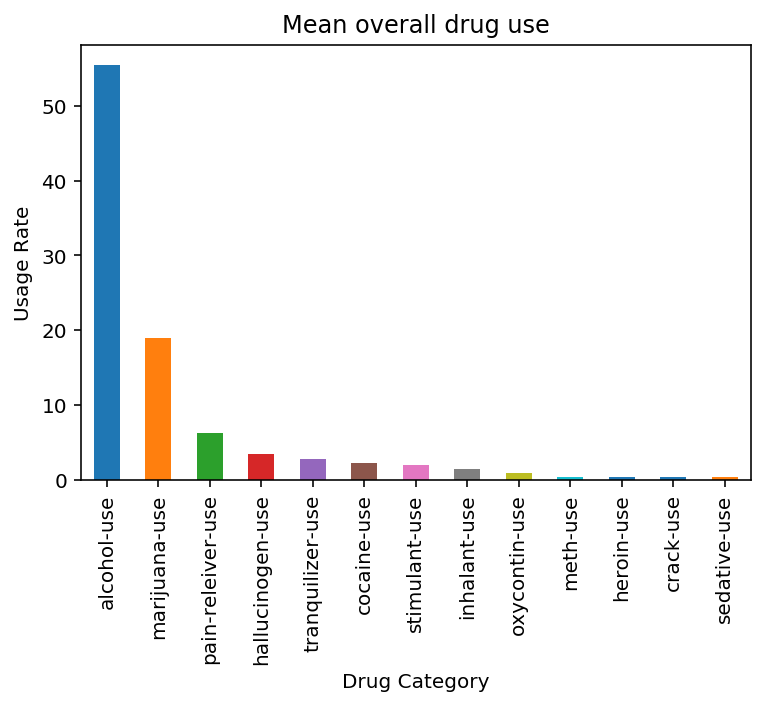

In [58]:
# plotting overall average drug use
drugspermean = drugsper.mean().sort_values(ascending=False)
plot1 = drugspermean.plot(kind='bar', legend=None, title='Mean overall drug use')
plot1.set_xlabel('Drug Category', fontsize=10)
plot1.set_ylabel('Usage Rate', fontsize=10)

Text(0,0.5,u'Usage Rate')

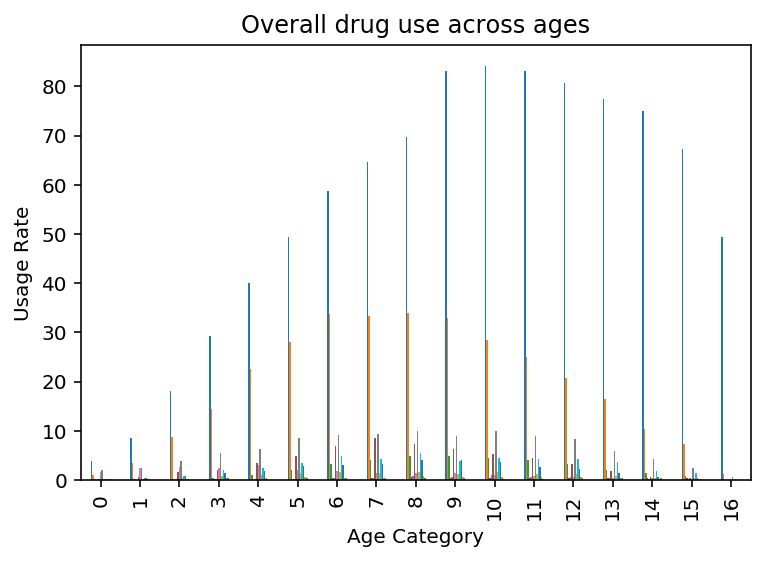

In [59]:
# plotting use across substances by age
plot2 = drugsper.plot(kind='bar', legend=None, title='Overall drug use across ages')
plot2.set_xlabel('Age Category', fontsize=10)
plot2.set_ylabel('Usage Rate', fontsize=10)

Text(0,0.5,u'Usage Rate')

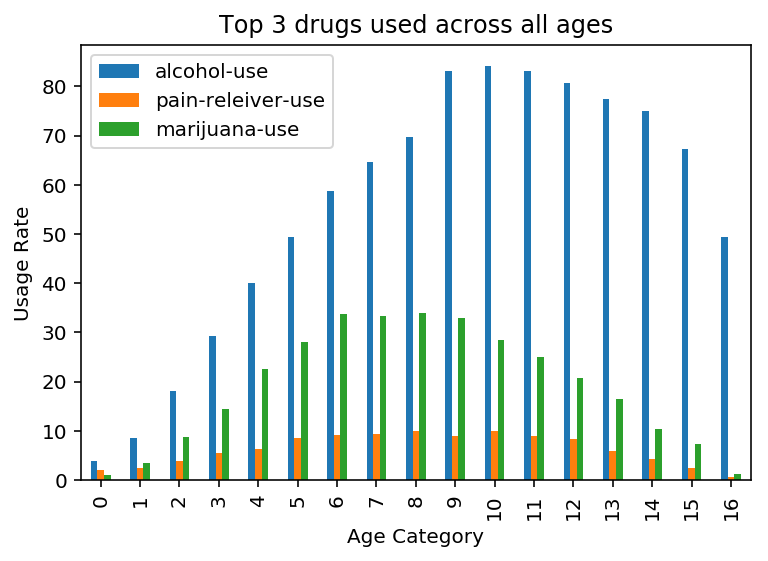

In [60]:
# plotting drug use across age categories for top 3 drugs
drugspertop = drugsper[['alcohol-use','pain-releiver-use','marijuana-use']]
plot5 = drugspertop.plot(kind='bar', legend='Drug Category', title='Top 3 drugs used across all ages')
plot5.set_xlabel('Age Category', fontsize=10)
plot5.set_ylabel('Usage Rate', fontsize=10)

Text(0,0.5,u'Frequency')

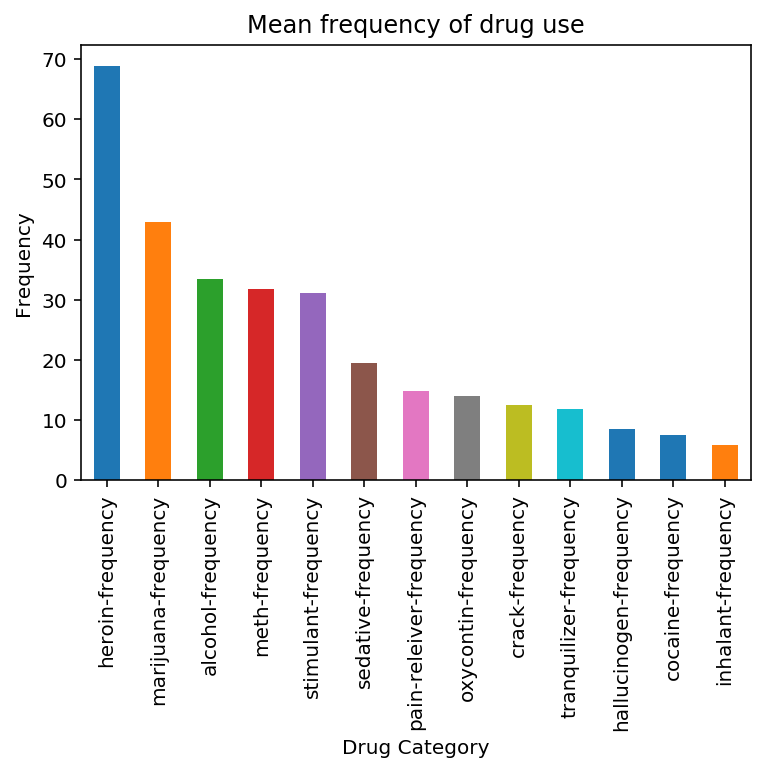

In [61]:
# plotting overall frequency of drug use for each drug used
drugsfreqmean = drugsfreq2.mean().sort_values(ascending=False)
plot3 = drugsfreqmean.plot(kind='bar', legend=None, title='Mean frequency of drug use')
plot3.set_xlabel('Drug Category', fontsize=10)
plot3.set_ylabel('Frequency', fontsize=10)

Text(0,0.5,u'Frequency')

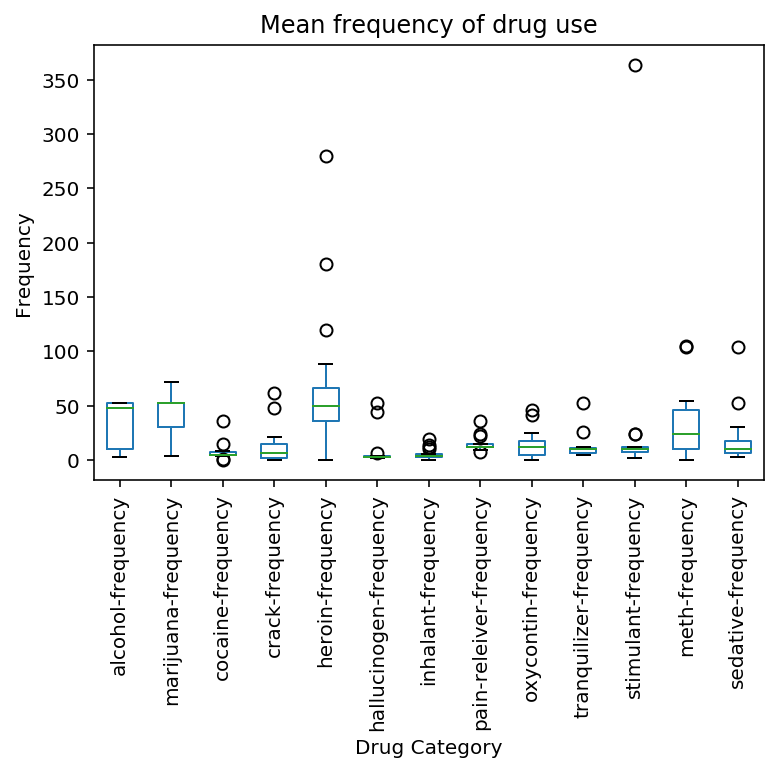

In [62]:
# plotting distribution of frequency of use for different drugs
plot4 = drugsfreq2.plot(kind='box', legend=None, title='Mean frequency of drug use',rot=90)
plot4.set_xlabel('Drug Category', fontsize=10)
plot4.set_ylabel('Frequency', fontsize=10)

In [63]:
# Summary of findings

# Alcohol is on average the most abused drug across the different age groups,
# with marijuana and pain relievers coming in 2nd and 3rd.

# Overall usage rates increase with age, peaking at the 22-23 age group for alcohol and 20 for marijuana/pain relievers,
# before decreasing with age thereafter.
# Alcohol is the only drug whose usage rate does not decrease to 0 with increase in age within adulthood. 
# For the 65+ age group, average usage rate of alcohol is still nearly 50%.

# Amongst abusers, the frequency of abuse is highest for heroin users, with marijuana and alcohol coming 2nd/3rd.

# Amongst abusers, the distribution of frequency of abuse is skewed by outliers for the less commonly abused drugs. 
# Furthermore, the range of distribution is wider for certain classes of drugs such as heroin and marijuana. This
# could indicate that the addictive properties of these drugs are greater/these drugs are easier access etc

# Additional note: Sample size for 30-49 age group is significantly larger, need to investigate possible effect.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [64]:
# Hypothesis 1 - Frequency of drug abuse is positively correlated with rate of drug abuse for users of hard drugs.
# Hypothesis 2 - Frequency of drug abuse is not correlated with rate of drug abuse for users of soft drugs.


# The categorisation of drugs into 'hard' or 'soft' is scientifically debated, though there are some commonly 
# agreed upon terms.These hypotheses will be tested using the data on top three drugs of choice of each type 
# (listed below) based on average usage rates.

In [65]:
# Hard Drugs 1) Hallucinogens 2) Cocaine 3) Stimulants

In [66]:
# Soft Drugs 1) Alcohol 2) Marijuana 3) Pain Relievers

In [67]:
# The deliverable would be correlation figures between the drug use rate and the frequency of drug use
# for the top three drugs of choice within each category. The hypotheses will be tested at the 5% level of significance.

In [68]:
# get subset of data for top 3 drugs
drugsmar = drugs[['age','marijuana-use','marijuana-frequency']]
drugsalc = drugs[['age','alcohol-use','alcohol-frequency']]
drugspain = drugs[['age','pain-releiver-use','pain-releiver-frequency']]
drugshal = drugs[['age','hallucinogen-use','hallucinogen-frequency']]
drugscoc = drugs[['age','cocaine-use','cocaine-frequency']]
drugssti = drugs[['age','stimulant-use','stimulant-frequency']]

In [69]:
# calculate correlation for hard drugs - hallucinogens
stats.pearsonr(drugshal['hallucinogen-use'], drugshal['hallucinogen-frequency'])

(-0.42786265287156117, 0.08666253116779615)

In [70]:
# calculate correlation for hard drugs - cocaine
stats.pearsonr(drugscoc['cocaine-use'], drugsfreq2['cocaine-frequency'])

(-0.07784815495891297, 0.7664831953980948)

In [71]:
# calculate correlation for hard drugs - stimulants
stats.pearsonr(drugssti['stimulant-use'], drugssti['stimulant-frequency'])

(-0.3633576178135256, 0.15168707641370008)

In [72]:
# calculate correlation for soft drugs - marijuana
stats.pearsonr(drugsmar['marijuana-use'], drugsmar['marijuana-frequency'])

(0.6156102019478248, 0.008518524650636638)

In [73]:
# calculate correlation for soft drugs - alcohol
stats.pearsonr(drugsalc['alcohol-use'], drugsalc['alcohol-frequency'])

(0.89788929382394, 1.00587475968489e-06)

In [74]:
# calculate correlation for soft drugs - pain relievers
stats.pearsonr(drugspain['pain-releiver-use'], drugspain['pain-releiver-frequency'])

(-0.46861747477662996, 0.05778014154916758)

**Report**

**Hypothesis 1**
For 'hard' drugs, the frequency of drug abuse is negatively correlated with rate of drug abuse. This is seen in the values of less than 0 reflected in pearson correlation calculations. This implies that across the age groups, when the rate of drug use increases, the frequency of drug use decreases for hard drugs. Therefore, the null hypothesis is rejected.

**Hypothesis 2**
For 'soft' drugs, the relationship between the frequency of drug abuse and rate of drug abuse is mixed. For alcohol and marijuana, the frequency of drug abuse is positively correlated with rate of drug abuse. This is seen in the positive values reflected in pearson correlation calculations. This implies that for both these drugs across the age groups, when the rate of drug use increases, the frequency of drug increases. For pain-relievers however, rate of drug use and frequency of drug use across age groups is negatively correlated (similar to the relationship exhibited by the 'hard' drugs earlier). The null hypothesis is once again rejected, as the correlation values are noticeably different from 0 in both cases.

**Notes**

Given the relatively small number of observations in each sample (16), I have choosen to ignore the p values associated with the correlation calculations to determine statistical significance.

The earlier hypothesis does not account for the changes in life (such as preferences, education level, health etc) associated with age, and hence this variable could play a part in affecting the correlations between frequency of use and usage rate for different classes of drugs. This would need to be investigated further.
...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [75]:
# 1) the variable 'satrate' has already been pulled out earlier
satrate.describe()

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

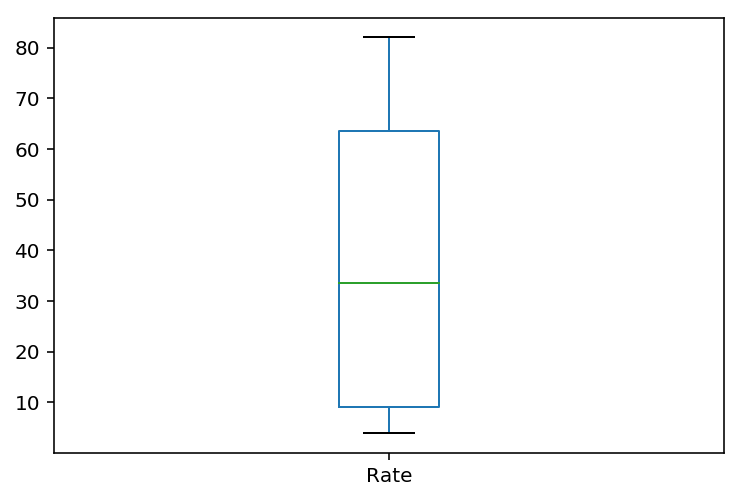

In [76]:
satrate.plot(kind='box')

In [77]:
# 2) Yes. I would define outliers as observations that lie more than 1.5 standard deviation away from the mean

In [78]:
# 3) Printing out outliers based on earlier definition
satdata[(satdata['Rate']>37.153846+1.5*27.301788) | (satdata['Rate']<37.153846-1.5*27.301788)][['Rate']]

,Rate
0,82
1,81
2,79


In [79]:
# 4) Removing outliers from dataset based on earlier index positions
satrate2 = satrate.drop(satrate.index[[0,1,2]])

In [80]:
# 5) Calculating new mean/median etc values
satrate2.describe()

count    49.000000
mean     34.489796
std      25.812725
min       4.000000
25%       9.000000
50%      31.000000
75%      57.000000
max      77.000000
Name: Rate, dtype: float64

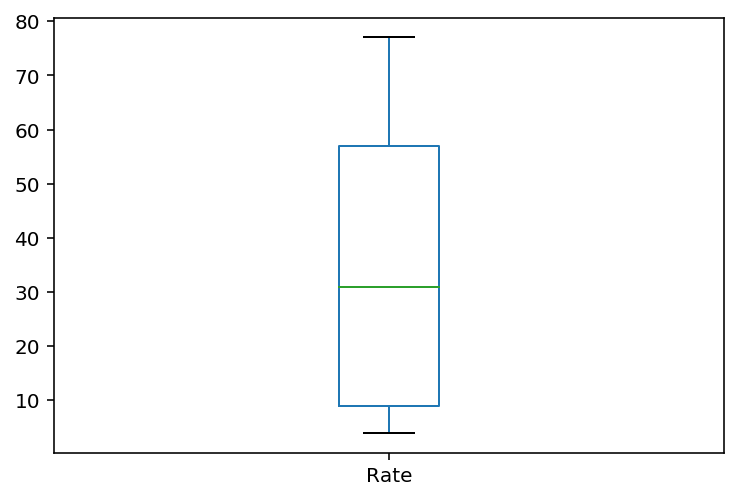

In [81]:
satrate2.plot(kind='box')

In [82]:
# Mean - new mean value is lower given the removal of the 3 largest values from earlier
# Median - new median value is lower given removal of the 3 largest values from earlier
# SD - the new standard deviation is lower given the removal of the 3 values furthest away from the mean earlier

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [83]:
# The Pearson correlation evaluates the linear relationship between two continuous variables. 
# A relationship is linear when a change in one variable is associated with a proportional change in the other variable

# The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables.
# The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

In [84]:
# Assign ordinal values to the variables of interest
# Calculate the difference of the ordinal values for each observation
# Square the difference
# Sub the difference and sample size into the equation for spearman correlation and calculate the value 

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [85]:
# Didn't get the chance to begin attempting this question

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [86]:
# Didn't get the chance to begin attempting this question